
# Project: Investigate a Dataset - movie



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about movies, with each row representing a single film. It includes financial details, ratings, popularity, and metadata such as cast, director, and genres.
Key Columns:
id , imdb_id =Unique identifiers.
budget , revenue = production cost and earnings.
budget_adj ,revenue_adj =show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
popularity , vote_count , vote_average =Popularity score, number of votes, and average rating.
original_title , director , cast , genres , production_companies = Descriptive movie details.
runtime ,release_date , release_year = Duration and release timing.
tagline ,keywords , overview ,homepage =  descriptive text.
The dataset is structured as a single table. The main questions for analysis are whether a higher budget leads to higher revenue and whether more expensive movies tend to receive better ratings.






### Question(s) for Analysis 
>1-Does a higher budget lead to higher revenue?

>2-Do more expensive movies get better ratings?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


#LODING DATA 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
#1-print out a few lines.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#2-size of dataframe
df.shape

(10866, 21)

In [4]:
#3-Check Data Types and Non-Null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# 4-data types of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# 5- Summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
 #6- Count of missing values per column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning


 

## Data Cleaning  
In this step, we will handle missing values, remove duplicates, and correct any obvious errors in the dataset.  
 


In [8]:
#Remove duplicate rows
df = df.drop_duplicates()

In [9]:
# print number of duplicates again to confirm dedupe 
print(df.duplicated().sum())

0


In [10]:
# drop rows with any null values in both datasets
df.dropna(inplace=True)

In [11]:
# checks if any of columns  have null values 
df.isnull().sum().any()

False

In [12]:
#Convert release_date from string → datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
#check
df.release_date.unique()

array(['2015-06-09T00:00:00.000000000', '2015-05-13T00:00:00.000000000',
       '2015-03-18T00:00:00.000000000', ...,
       '1978-07-27T00:00:00.000000000', '1978-05-01T00:00:00.000000000',
       '1978-07-28T00:00:00.000000000'], dtype='datetime64[ns]')

<a id='eda'></a>
## Exploratory Data Analysis







In [14]:
def plot_hist(df, col):
    """Plot histogram"""
    df[col].plot(kind='hist', figsize=(10,5), title=f'{col} Distribution')
    plt.xlabel(col); 
    plt.ylabel('Frequency'); 

In [15]:
def plot_scatter(df, x_col, y_col):
    """Plot scatter"""
    df.plot(kind='scatter', x=x_col, y=y_col, figsize=(10,5), title=f'{x_col} vs {y_col}')
    plt.xlabel(x_col); 
    plt.ylabel(y_col); 

### Research Question 1 :Does a higher budget lead to higher revenue?  


the  aim  is to investigate whether a higher budget generally leads to higher revenue.  



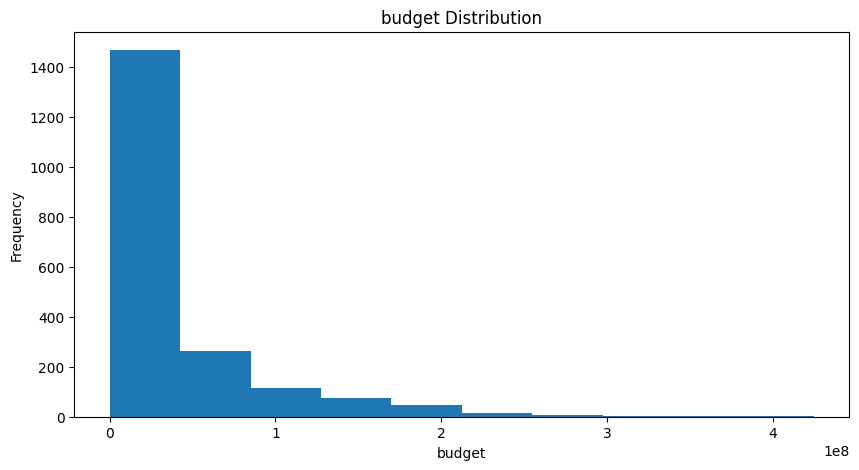

In [16]:
plot_hist(df, 'budget')# Plotting a histogram for the 'Budget' column

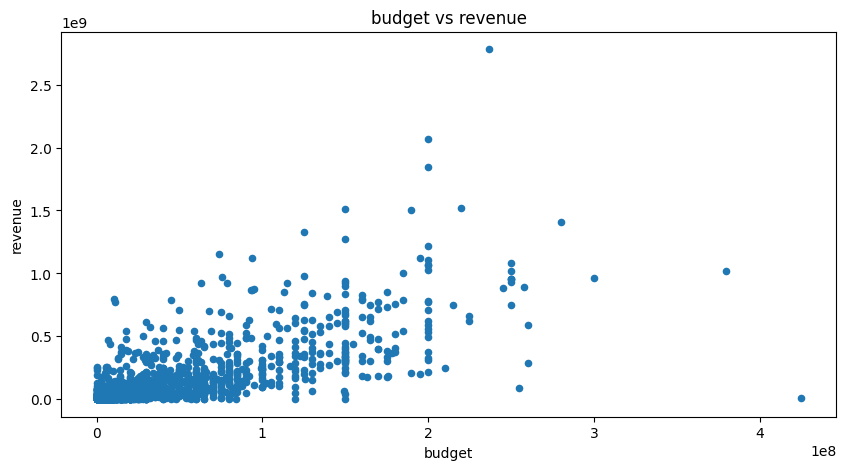

In [17]:
plot_scatter(df, 'budget', 'revenue')# Plotting a scatter plot between movie budget and Revenue



### Research Question 2 :Do more expensive movies get better ratings?

Aim  is to investigate whether expensive movies generally leads to higher ratings .  


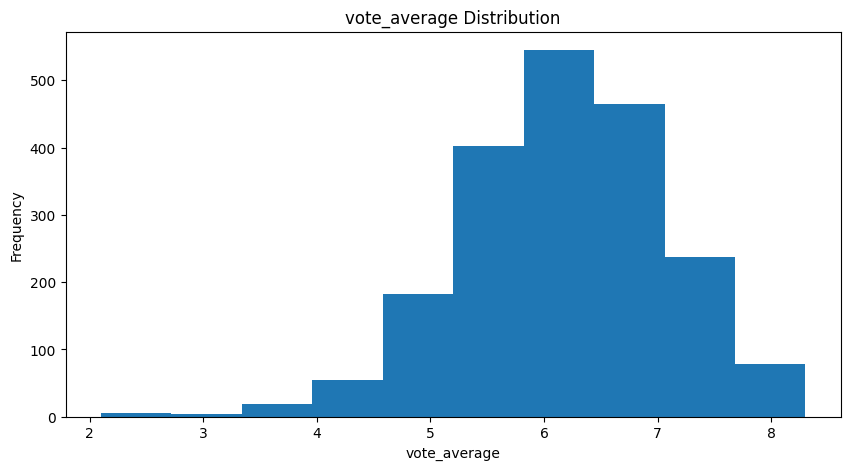

In [18]:
plot_hist(df, 'vote_average')# Plotting a histogram for the 'vote_average' column

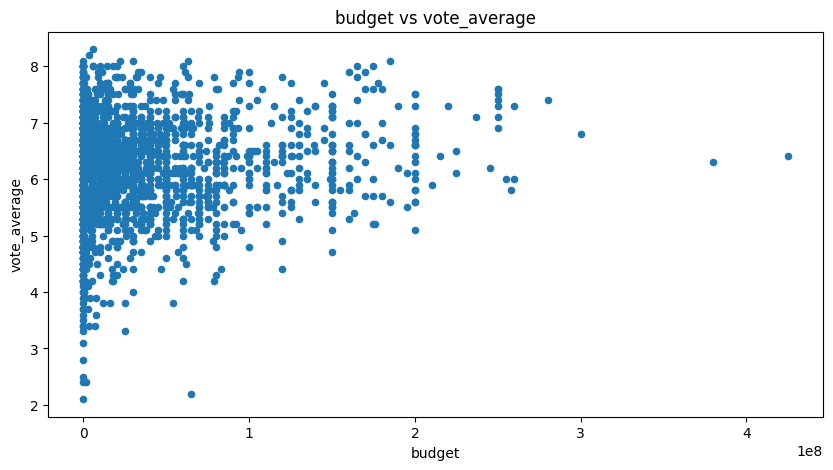

In [19]:
plot_scatter(df, 'budget', 'vote_average')# Plotting a scatter plot between movie budget and average vote

<a id='conclusions'></a>
## Conclusions

>Research Question 1: Does a higher budget lead to higher revenue?
The scatter plot shows a positive trend, indicating that movies with higher budgets generally earn higher revenue.

>Research Question 2: Do more expensive movies get better ratings?
The scatter plot shows no clear trend, meaning that higher budgets do not necessarily result in higher vote averages.






>Limitations Dropping all rows with null values removed many movies, which may slightly bias the analysis.